In [1]:
pwd

'/Users/aloswain/Downloads/Cisco/cisco_hackathon_2018'

In [2]:
%matplotlib inline

In [3]:
import pandas as pd

In [12]:
#df = pd.read_csv('hackathon', index_col=0)
df = pd.read_csv('capture_with_rssi_channel', index_col=0, error_bad_lines=False, warn_bad_lines=False, skipfooter=1)

print(df.head())

     Sequence number             Time     Source address  Sequence number.1  \
No.                                                                           
1                NaN  03:18:29.338087                NaN                NaN   
2                NaN  03:18:29.338162                NaN                NaN   
3                NaN  03:18:29.338220  00:93:c0:a8:01:0a                NaN   
4                NaN  03:18:29.338241  00:93:c0:a8:01:0a                NaN   
5                NaN  03:18:29.347821                NaN                NaN   

      Source address.1 Transmitter address        Source  Data rate  Length  \
No.                                                                           
1                  NaN   00:81:c0:a8:01:0b  192.168.80.5       24.0      94   
2                  NaN   00:81:c0:a8:01:0b  192.168.80.8       24.0     122   
3    00:93:c0:a8:01:0a   00:da:55:be:08:6f  192.168.1.10        NaN     181   
4    00:93:c0:a8:01:0a   00:da:55:be:08:6f  192.168

/Users/aloswain/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [13]:
df

,Sequence number,Time,Source address,Sequence number.1,Source address.1,Transmitter address,Source,Data rate,Length,Destination,...,Partial Virtual Bitmap,Receiver address,Source address.2,Source address.3,Destination address,Protocol,Transmitter address.1,Signal [dBm],Channel,Info
No.,,,,,,,,,,,,,,,,,,,,,
1,NaN,03:18:29.338087,NaN,NaN,NaN,00:81:c0:a8:01:0b,192.168.80.5,24.0,94,192.168.80.8,...,NaN,00:da:55:be:08:6f,NaN,NaN,NaN,802.11,00:81:c0:a8:01:0b,16.0,81.0,"802.11 Block Ack, Flags=........."
2,NaN,03:18:29.338162,NaN,NaN,NaN,00:81:c0:a8:01:0b,192.168.80.8,24.0,122,192.168.80.5,...,NaN,00:da:55:be:08:6f,NaN,NaN,NaN,ICMP,00:81:c0:a8:01:0b,16.0,81.0,Destination unreachable (Port unreachable)
3,NaN,03:18:29.338220,00:93:c0:a8:01:0a,NaN,00:93:c0:a8:01:0a,00:da:55:be:08:6f,192.168.1.10,NaN,181,192.168.1.11,...,NaN,00:81:c0:a8:01:0b,00:93:c0:a8:01:0a,00:93:c0:a8:01:0a,00:81:c0:a8:01:0b,UDP,00:da:55:be:08:6f,32.0,81.0,8000 > 9025 Len=18
4,NaN,03:18:29.338241,00:93:c0:a8:01:0a,NaN,00:93:c0:a8:01:0a,00:da:55:be:08:6f,192.168.80.8,NaN,209,192.168.80.5,...,NaN,00:81:c0:a8:01:0b,00:93:c0:a8:01:0a,00:93:c0:a8:01:0a,00:81:c0:a8:01:0b,ICMP,00:da:55:be:08:6f,32.0,81.0,Destination unreachable (Port unreachable)
5,NaN,03:18:29.347821,NaN,NaN,NaN,00:81:c0:a8:01:0b,192.168.80.5,24.0,94,192.168.80.8,...,NaN,00:da:55:be:08:6f,NaN,NaN,NaN,802.11,00:81:c0:a8:01:0b,16.0,81.0,"802.11 Block Ack, Flags=........."
6,NaN,03:18:29.347853,NaN,NaN,NaN,00:81:c0:a8:01:0b,192.168.80.8,24.0,122,192.168.80.5,...,NaN,00:da:55:be:08:6f,NaN,NaN,NaN,ICMP,00:81:c0:a8:01:0b,16.0,81.0,Destination unreachable (Port unreachable)
7,NaN,03:18:29.347956,00:93:c0:a8:01:0a,NaN,00:93:c0:a8:01:0a,00:da:55:be:08:6f,192.168.1.10,NaN,181,192.168.1.11,...,NaN,00:81:c0:a8:01:0b,00:93:c0:a8:01:0a,00:93:c0:a8:01:0a,00:81:c0:a8:01:0b,UDP,00:da:55:be:08:6f,32.0,81.0,8000 > 9025 Len=18
8,NaN,03:18:29.347990,00:93:c0:a8:01:0a,NaN,00:93:c0:a8:01:0a,00:da:55:be:08:6f,192.168.80.8,NaN,209,192.168.80.5,...,NaN,00:81:c0:a8:01:0b,00:93:c0:a8:01:0a,00:93:c0:a8:01:0a,00:81:c0:a8:01:0b,ICMP,00:da:55:be:08:6f,32.0,81.0,Destination unreachable (Port unreachable)
9,NaN,03:18:29.357444,NaN,NaN,NaN,00:81:c0:a8:01:0b,192.168.80.5,24.0,94,192.168.80.8,...,NaN,00:da:55:be:08:6f,NaN,NaN,NaN,802.11,00:81:c0:a8:01:0b,16.0,81.0,"802.11 Block Ack, Flags=........."


In [14]:
print(df.columns)

Index(['Sequence number', 'Time', 'Source address', 'Sequence number.1',
       'Source address.1', 'Transmitter address', 'Source', 'Data rate',
       'Length', 'Destination', 'TID', 'TID.1', 'PWR MGT',
       'Partial Virtual Bitmap', 'Receiver address', 'Source address.2',
       'Source address.3', 'Destination address', 'Protocol',
       'Transmitter address.1', 'Signal [dBm]', 'Channel', 'Info'],
      dtype='object')


In [46]:
x = (pd.to_datetime(df['Time'],infer_datetime_format=True))
x.head()

No.
1   2018-03-08 03:18:29.338087
2   2018-03-08 03:18:29.338162
3   2018-03-08 03:18:29.338220
4   2018-03-08 03:18:29.338241
5   2018-03-08 03:18:29.347821
Name: Time, dtype: datetime64[ns]

In [47]:
#print(df['Time'])

In [48]:
y = df['Signal [dBm]']
y.head()

No.
1    16.0
2    16.0
3    32.0
4    32.0
5    16.0
Name: Signal [dBm], dtype: float64

In [38]:
#import matplotlib as plt
#plt.colorbar(heatmap)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [53]:
type(y)

pandas.core.series.Series

In [63]:
ts = pd.Series(y) #, index=x)
ts.head(100)

No.
1      16.0
2      16.0
3      32.0
4      32.0
5      16.0
6      16.0
7      32.0
8      32.0
9      16.0
10     16.0
11     32.0
12     32.0
13     16.0
14     16.0
15     32.0
16     32.0
17      NaN
18     16.0
19     16.0
20     32.0
21     32.0
22     16.0
23     16.0
24     16.0
25     16.0
26     32.0
27     32.0
28     16.0
29     16.0
30     32.0
       ... 
71     16.0
72     32.0
73     32.0
74     16.0
75     16.0
76     32.0
77     32.0
78     16.0
79     16.0
80     32.0
81     32.0
82     16.0
83     16.0
84     32.0
85     32.0
86     16.0
87     16.0
88     32.0
89     32.0
90     16.0
91     16.0
92     32.0
93     32.0
94     16.0
95     16.0
96     32.0
97     32.0
98     16.0
99     16.0
100    32.0
Name: Signal [dBm], Length: 100, dtype: float64

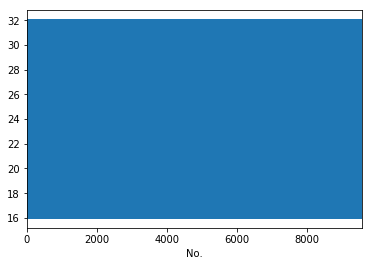

In [64]:
ts.plot()

In [50]:
ts.head()

Time
2018-03-08 03:18:29.338087   NaN
2018-03-08 03:18:29.338162   NaN
2018-03-08 03:18:29.338220   NaN
2018-03-08 03:18:29.338241   NaN
2018-03-08 03:18:29.347821   NaN
Name: Signal [dBm], dtype: float64

In [59]:
print((x.dtype))
print((y.dtype))

datetime64[ns]
float64


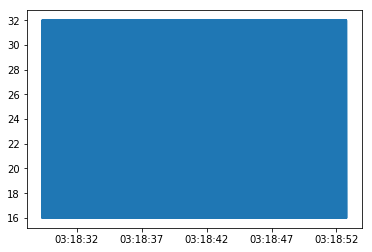

In [61]:
plt.plot(x, (y))

In [41]:
y.head()

No.
1    16.0
2    16.0
3    32.0
4    32.0
5    16.0
Name: Signal [dBm], dtype: float64

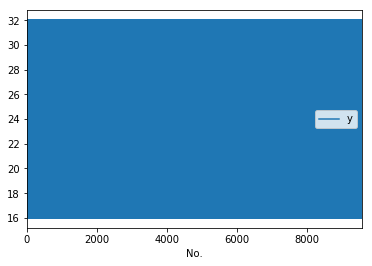

In [68]:
df1 = pd.DataFrame ({'x' : x, 'y':y})
df1.plot()

In [81]:
#df1.set_index('x', inplace=True)
pd.DataFrame.plot.scatter(x, y)

TypeError: scatter() missing 1 required positional argument: 'y'

In [74]:
df1.head()

,y
x,
2018-03-08 03:18:29.338087,16.0
2018-03-08 03:18:29.338162,16.0
2018-03-08 03:18:29.338220,32.0
2018-03-08 03:18:29.338241,32.0
2018-03-08 03:18:29.347821,16.0
